In [1]:
# !pip install pillow
# !pip install opencv-python
# !pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Binarización con método de Otsu

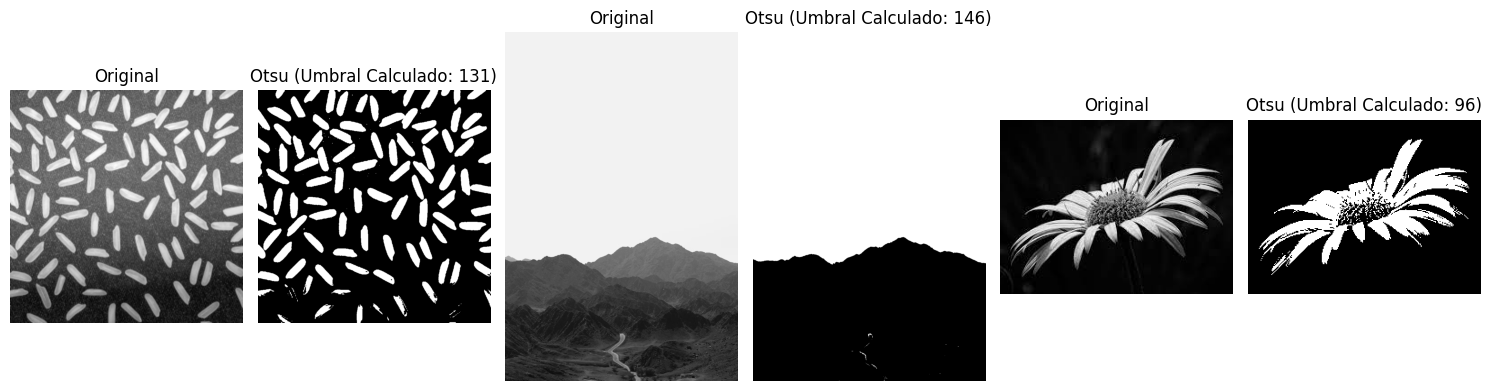

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def otsu_thresholding(image_array):
    # Calcula el histograma de la imagen
    histogram, bin_edges = np.histogram(image_array, bins=256, range=(0, 256))

    # Normaliza el histograma
    histogram_normalized = histogram / float(np.sum(histogram))

    # Inicializa variables
    sum_all = np.sum(np.arange(256) * histogram_normalized)
    sum_back = 0
    w_back = 0
    w_fore = 0

    var_max = 0
    threshold = 0

    # Itera a través de los posibles umbrales
    for t in range(256):
        w_back += histogram_normalized[t]
        if w_back == 0:
            continue

        w_fore = 1.0 - w_back
        if w_fore == 0:
            break

        sum_back += t * histogram_normalized[t]
        mean_back = sum_back / w_back

        mean_fore = (sum_all - sum_back) / w_fore

        var_between = w_back * w_fore * (mean_back - mean_fore) ** 2

        # Actualiza el umbral si encontramos una varianza mayor
        if var_between > var_max:
            var_max = var_between
            threshold = t

    return threshold

def segment_image(image_array):
    # Calcular el umbral de Otsu
    otsu_threshold = otsu_thresholding(image_array)

    # Aplicar el umbral para crear una imagen binaria
    segmented_image = image_array > otsu_threshold

    return segmented_image, otsu_threshold

# Lista de rutas de imágenes
image_paths = ['./Imgs/rice.jpg', './Imgs/mountain.jpg', './Imgs/planta.jpg']

# Crear un subplot para cada imagen
fig, axes = plt.subplots(1, len(image_paths) * 2, figsize=(15, 5))

for i, image_path in enumerate(image_paths):
    # Cargar la imagen
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises
    image_array = np.array(image)

    # Segmentar la imagen
    segmented_image, otsu_threshold = segment_image(image_array)

    # Mostrar la imagen original y la segmentada en el subplot correspondiente
    axes[i * 2].imshow(image, cmap='gray')
    axes[i * 2].set_title(f'Original')
    axes[i * 2].axis('off')

    axes[i * 2 + 1].imshow(segmented_image, cmap='gray')
    axes[i * 2 + 1].set_title(f'Otsu (Umbral Calculado: {otsu_threshold})')
    axes[i * 2 + 1].axis('off')

plt.tight_layout()
plt.show()


## Binarización con método de Riddler-Calvard

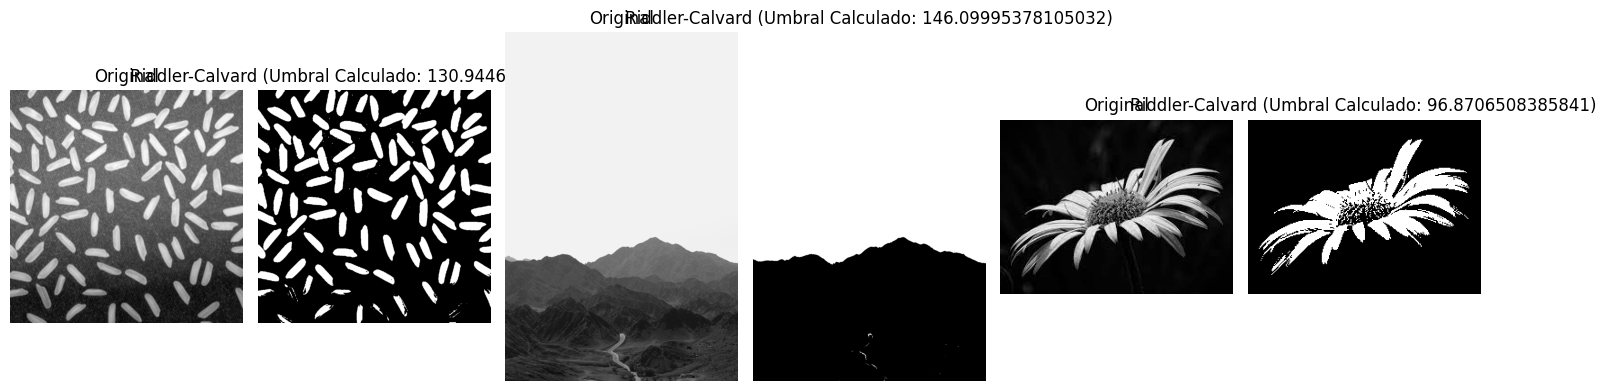

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def riddler_calvard_thresholding(image_array):
    # Inicializa variables
    threshold = 0.5 * (np.min(image_array) + np.max(image_array))

    while True:
        # Clasifica los píxeles en dos grupos según el umbral actual
        group1 = image_array > threshold
        group2 = image_array <= threshold

        # Calcula los promedios de cada grupo
        mean1 = np.mean(image_array[group1])
        mean2 = np.mean(image_array[group2])

        # Actualiza el umbral
        new_threshold = 0.5 * (mean1 + mean2)

        # Verifica si el umbral ha convergido
        if abs(new_threshold - threshold) < 0.5:
            break

        threshold = new_threshold

    return threshold

def segment_image_riddler_calvard(image_array):
    # Calcular el umbral de Riddler-Calvard
    riddler_calvard_threshold = riddler_calvard_thresholding(image_array)

    # Aplicar el umbral para crear una imagen binaria
    segmented_image = image_array > riddler_calvard_threshold

    return segmented_image, riddler_calvard_threshold

# Lista de rutas de imágenes
image_paths = ['./Imgs/rice.jpg', './Imgs/mountain.jpg', './Imgs/planta.jpg']

# Crear un subplot para cada imagen
fig, axes = plt.subplots(1, len(image_paths) * 2, figsize=(15, 5))

for i, image_path in enumerate(image_paths):
    # Cargar la imagen
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises
    image_array = np.array(image)

    # Segmentar la imagen usando Riddler-Calvard
    segmented_image, riddler_calvard_threshold = segment_image_riddler_calvard(image_array)

    # Mostrar la imagen original y la segmentada en el subplot correspondiente
    axes[i * 2].imshow(image, cmap='gray')
    axes[i * 2].set_title(f'Original')
    axes[i * 2].axis('off')

    axes[i * 2 + 1].imshow(segmented_image, cmap='gray')
    axes[i * 2 + 1].set_title(f'Riddler-Calvard (Umbral Calculado: {riddler_calvard_threshold})')
    axes[i * 2 + 1].axis('off')

plt.tight_layout()
plt.show()


## Binarización con método de algoritmoo local

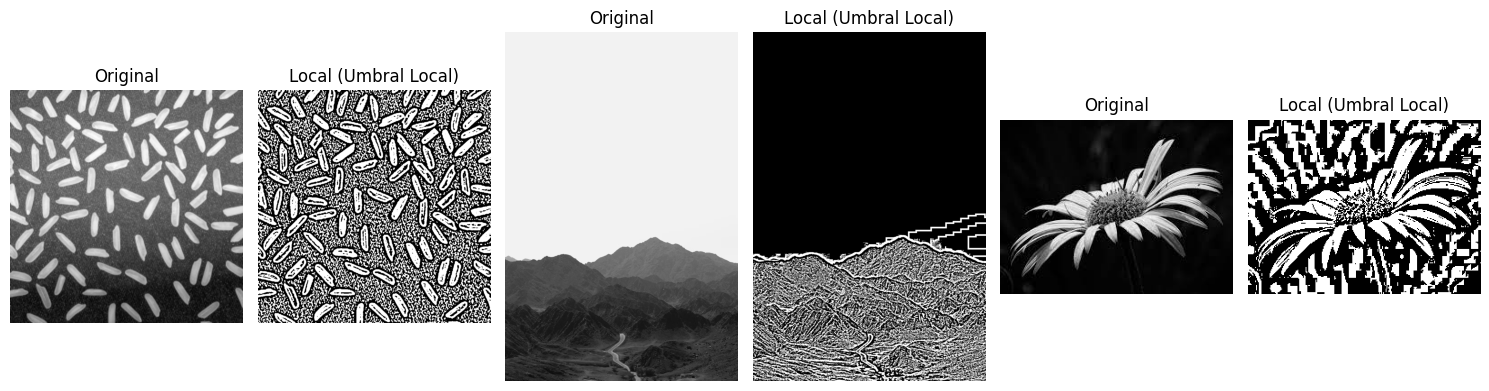

In [15]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def local_thresholding(image_array, window_size):
    height, width = image_array.shape
    segmented_image = np.zeros_like(image_array, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            # Definir límites de la ventana
            y_start, y_end = max(0, y - window_size // 2), min(height, y + window_size // 2 + 1)
            x_start, x_end = max(0, x - window_size // 2), min(width, x + window_size // 2 + 1)

            # Extraer la región local
            local_region = image_array[y_start:y_end, x_start:x_end]

            # Calcular el umbral local (usando el promedio de la región local)
            local_threshold = np.mean(local_region)

            # Aplicar el umbral local
            segmented_image[y, x] = 255 if image_array[y, x] > local_threshold else 0

    return segmented_image

# Lista de rutas de imágenes
image_paths = ['./Imgs/rice.jpg', './Imgs/mountain.jpg', './Imgs/planta.jpg']

# Crear un subplot para cada imagen
fig, axes = plt.subplots(1, len(image_paths) * 2, figsize=(15, 5))

# Tamaño de la ventana deslizante
window_size = 15

for i, image_path in enumerate(image_paths):
    # Cargar la imagen
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises
    image_array = np.array(image)

    # Segmentar la imagen localmente
    segmented_image_local = local_thresholding(image_array, window_size)

    # Mostrar la imagen original y la segmentada en el subplot correspondiente
    axes[i * 2].imshow(image, cmap='gray')
    axes[i * 2].set_title(f'Original')
    axes[i * 2].axis('off')

    axes[i * 2 + 1].imshow(segmented_image_local, cmap='gray')
    axes[i * 2 + 1].set_title(f'Local (Umbral Local)')
    axes[i * 2 + 1].axis('off')

plt.tight_layout()
plt.show()
